In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Question 2

Consider the CSV file `government-expenditure-on-education.csv`, which depicts the government's educational expenditure over the years. We would like to predict expenditure as a function of the year. To do this, fit an exponential model `f(x, w) = exp(-x^T*w)` with squared error loss to estimate `w` based on the CSV file and gradient descent.

In [2]:
df = pd.read_csv("government-expenditure-on-education.csv")
expenditure = df['total_expenditure_on_education'].to_numpy()
years = df['year'].to_numpy()

In [3]:
LEARNING_RATE = 0.03
NUM_ITERS = 2000000

## Part a

Plot the cost function C(w) as a function of the number of iterations.

In [4]:
# normalisation
max_expenditure = max(expenditure)
max_year = max(years)
y = expenditure/max_expenditure
X = np.ones([len(y), 2])
X[:, 1] = years/max_year

In [5]:
X

array([[1.        , 0.98020782],
       [1.        , 0.98070262],
       [1.        , 0.98119743],
       [1.        , 0.98169223],
       [1.        , 0.98218704],
       [1.        , 0.98268184],
       [1.        , 0.98317665],
       [1.        , 0.98367145],
       [1.        , 0.98416625],
       [1.        , 0.98466106],
       [1.        , 0.98515586],
       [1.        , 0.98565067],
       [1.        , 0.98614547],
       [1.        , 0.98664028],
       [1.        , 0.98713508],
       [1.        , 0.98762989],
       [1.        , 0.98812469],
       [1.        , 0.9886195 ],
       [1.        , 0.9891143 ],
       [1.        , 0.9896091 ],
       [1.        , 0.99010391],
       [1.        , 0.99059871],
       [1.        , 0.99109352],
       [1.        , 0.99158832],
       [1.        , 0.99208313],
       [1.        , 0.99257793],
       [1.        , 0.99307274],
       [1.        , 0.99356754],
       [1.        , 0.99406235],
       [1.        , 0.99455715],
       [1.

In [ ]:
w = np.zeros(2)
pred = np.exp(-X @ w)
w

array([0., 0.])

In [6]:
def training_step(X, w, y):
    # Compute the prediction given this set of weights and the input data point
    pred = np.exp(-X @ w) # X without T as X is already X.T in the qn
    # Compute the cost of this prediction
    cost = np.sum((pred - y) * (pred - y))
    # Compute the gradients for each variable/parameter
    gradient = (-2 * (pred-y) * pred) @ X
    return pred, cost, gradient

In [7]:
# Gradient descent
w = np.zeros(2)
# Perform first gradient descent step
pred_y, cost, gradient = training_step(X, w, y)

# Save the cost over iterations
cost_vec = np.zeros(NUM_ITERS)
print('Initial Cost =', cost)

for i in range(0, NUM_ITERS):
    # update w
    w = w - LEARNING_RATE * gradient

    # compute updated cost and new gradient
    pred_y, cost, gradient = training_step(X, w, y)
    cost_vec[i] = cost

    if i % 200000 == 0:
        print('Iter', i, ': cost =', cost)

pred_y, cost, gradient = training_step(X, w, y)
print('Final Cost =', cost)

Initial Cost = 14.937100519620373
Iter 0 : cost = 10.575967781679882
Iter 200000 : cost = 0.24817872849586065
Iter 400000 : cost = 0.18897824166896673
Iter 600000 : cost = 0.18671897316121938
Iter 800000 : cost = 0.18661418646652303
Iter 1000000 : cost = 0.18660912709830219
Iter 1200000 : cost = 0.1866088806744905
Iter 1400000 : cost = 0.18660886864893309
Iter 1600000 : cost = 0.18660886806182947
Iter 1800000 : cost = 0.18660886803316845
Final Cost = 0.18660886803176563


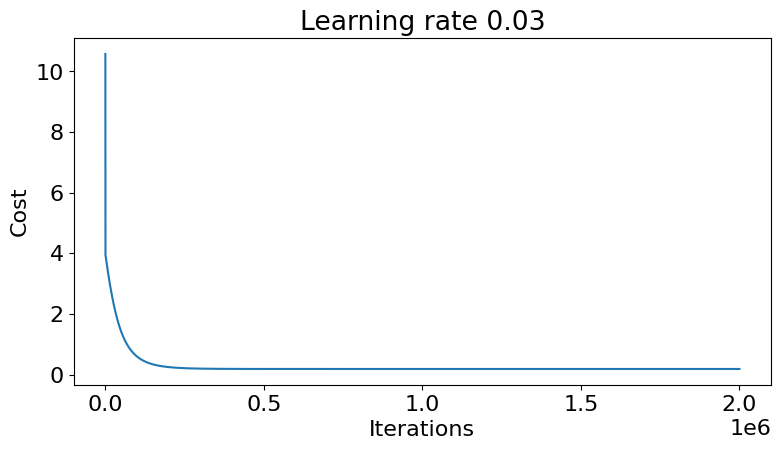

In [9]:
# Plot cost function values over iterations
plt.figure(0, figsize=[9,4.5])
plt.rcParams.update({'font.size': 16})
plt.plot(np.arange(0, NUM_ITERS, 1), cost_vec)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.xticks(np.arange(0, NUM_ITERS + 1, 500000))
plt.title("Learning rate " + str(LEARNING_RATE))
plt.show()

## Part b

Use the fitted parameters to plot the predicted educational expenditure from year 1981 to year 2023.

In [11]:
# Extrapolate until year 2023
ext_years = np.arange(min(years), 2024, 1)
ext_X = np.ones([len(ext_years), 2])
ext_X[:, 1] = ext_years/max_year
pred_y = np.exp(-ext_X @ w) # expenditure after normalisation

In [10]:
min(years)

1981

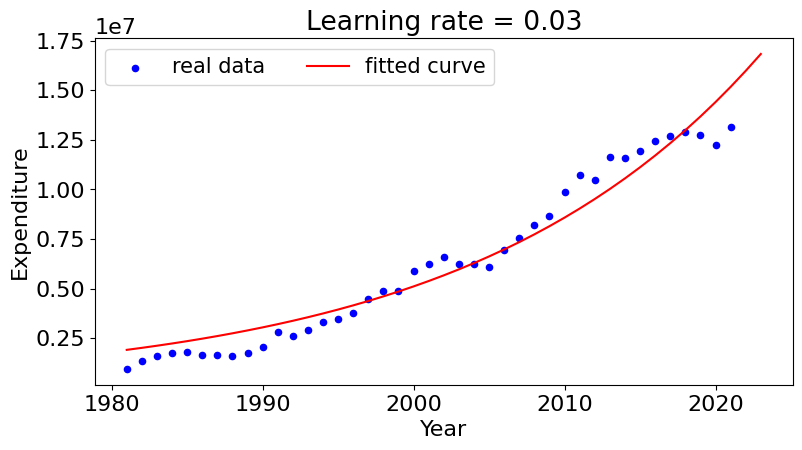

In [12]:
# Plot extrapolation
plt.figure(1, figsize=[9,4.5])
plt.rcParams.update({'font.size': 16})
plt.scatter(years, expenditure, s=20, marker='o', c='blue', label='real data')
plt.plot(ext_years, pred_y * max_expenditure, c='red', label='fitted curve')
plt.xlabel('Year')
plt.ylabel('Expenditure')
plt.title('Learning rate = ' + str(LEARNING_RATE))
plt.legend(loc='upper left',ncol=3, fontsize=15)
plt.show()

## Part c

Repeat (a) using a learning rate of 0.1 and learning rate of 0.001. What do you observe relative to (a)?

In [13]:
# Gradient descent
w = np.zeros(2)
# Perform first gradient descent step
pred_y, cost, gradient = training_step(X, w, y)

# Save the cost over iterations
cost_vec = np.zeros(NUM_ITERS)
print('Initial Cost =', cost)

for i in range(0, NUM_ITERS):
    # update w
    w = w - 0.1 * gradient

    # compute updated cost and new gradient
    pred_y, cost, gradient = training_step(X, w, y)
    cost_vec[i] = cost

    if i % 200000 == 0:
        print('Iter', i, ': cost =', cost)

pred_y, cost, gradient = training_step(X, w, y)
print('Final Cost =', cost)

Initial Cost = 14.937100519620373
Iter 0 : cost = 13.474743250544236
Iter 200000 : cost = 13.466358606143654
Iter 400000 : cost = 13.463881446512733
Iter 600000 : cost = 13.478297396624756
Iter 800000 : cost = 13.481052004749422
Iter 1000000 : cost = 13.402947418985113
Iter 1200000 : cost = 13.477989111630887
Iter 1400000 : cost = 13.393096654507062
Iter 1600000 : cost = 13.449340798637717
Iter 1800000 : cost = 13.4789023838142
Final Cost = 13.481327271193464


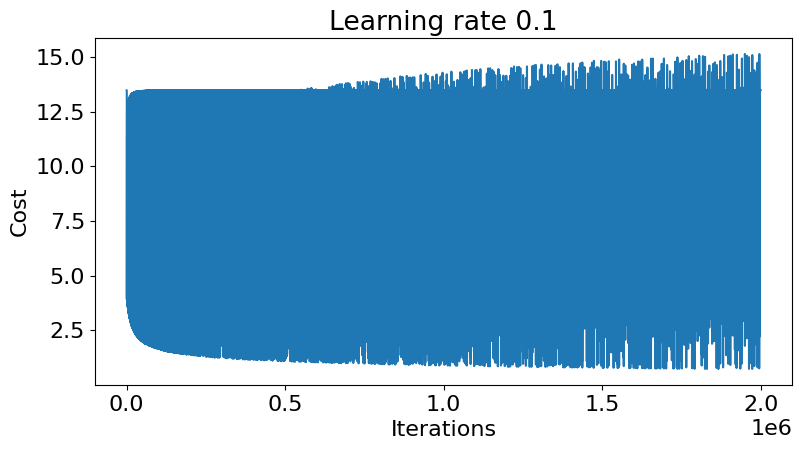

In [ ]:
# Plot cost function values over iterations
plt.figure(0, figsize=[9,4.5])
plt.rcParams.update({'font.size': 16})
plt.plot(np.arange(0, NUM_ITERS, 1), cost_vec)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.xticks(np.arange(0, NUM_ITERS + 1, 500000))
plt.title("Learning rate 0.1")
plt.show()

In [ ]:
# Gradient descent
w = np.zeros(2)
# Perform first gradient descent step
pred_y, cost, gradient = training_step(X, w, y)

# Save the cost over iterations
cost_vec = np.zeros(NUM_ITERS)
print('Initial Cost =', cost)

for i in range(0, NUM_ITERS):
    # update w
    w = w - 0.001 * gradient

    # compute updated cost and new gradient
    pred_y, cost, gradient = training_step(X, w, y)
    cost_vec[i] = cost

    if i % 200000 == 0:
        print('Iter', i, ': cost =', cost)

pred_y, cost, gradient = training_step(X, w, y)
print('Final Cost =', cost)

Initial Cost = 14.937100519620373
Iter 0 : cost = 11.790865962831525
Iter 200000 : cost = 3.487853092137071
Iter 400000 : cost = 3.045116666683137
Iter 600000 : cost = 2.6491678057067265
Iter 800000 : cost = 2.3008085952851864
Iter 1000000 : cost = 1.9981961634661403
Iter 1200000 : cost = 1.7377771980854957
Iter 1400000 : cost = 1.5151163684020426
Iter 1600000 : cost = 1.3255169170278498
Iter 1800000 : cost = 1.1644252834723177
Final Cost = 1.0276592799834954


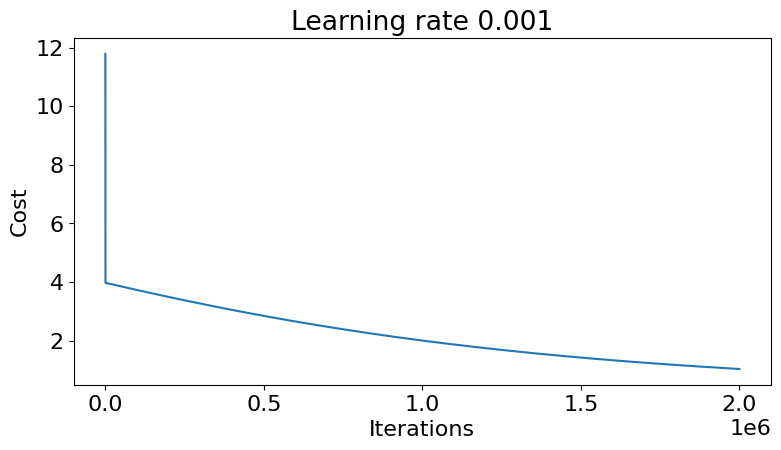

In [ ]:
# Plot cost function values over iterations
plt.figure(0, figsize=[9,4.5])
plt.rcParams.update({'font.size': 16})
plt.plot(np.arange(0, NUM_ITERS, 1), cost_vec)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.xticks(np.arange(0, NUM_ITERS + 1, 500000))
plt.title("Learning rate 0.001")
plt.show()